# Wiederholung: Größtfehler, oder lineare Fehlerfortpflanzung

Formel:

$\Delta F(X_1, X_2, ...) = | \frac{\partial F}{\partial X_1 } \cdot \Delta X_1 | + | \frac{\partial F}{\partial X_2 } \cdot \Delta X_2 | + |...|
$

## Beispiel 1: Strommessung über Widerstand

Der Strom $I$ wird aus fehlerbehafteten Größen $U$ und $R$ berechnet

$I(U,R)=\frac{U}{R}$

$\Delta I = | \frac{\partial I}{\partial U } \cdot \Delta U | + | \frac{\partial I}{\partial R } \cdot \Delta R | 
$

Partielle Ableitungen bilden:

$\frac{\partial I}{\partial U } = \frac{1}{R}$

$\frac{\partial I}{\partial R } = -\frac{U}{{{R}^{2}}}$

Angenommene Werte und Maximalfehler:

$R  = 10.0 \mathrm{Ohm}$

$U  = 1 \mathrm{V}$

$\Delta R  = \pm 0.1 \mathrm{Ohm}$

$\Delta U  = \pm 0.01 \mathrm{V}$

Einsetzen und $\Delta I $ bestimmen:

$\Delta I = 2 \mathrm{mA}$

### Grafische Darstellung

Das Anwenden der Formel für den Größtfehler entspricht zunächst einer Linearisierung im Arbeitspunkt $I(U=1 \mathrm{V}, R  = 10.0 \mathrm{Ohm})$. 

Für Beispiel 1 kann dies gut grafisch 3-dimensional dargestellt werden (siehe folgenden 2 Abbildungen):

* 1. horizontale Achse -> Abweichung von $R$
* 2. horizontale Achse -> Abweichung von $U$
* vertikale Achse -> Der resultierende Einfluss auf den gemessenen Strom

Das Ergebnis der Linearisierung entspricht einer Ebene im 3-dimensionalen Raum.

Die zwei partiellen Ableitungen $\frac{\partial I}{\partial U }$ und $\frac{\partial I}{\partial R }$ entsprechen jeweils der Steigung der Ebene in die zwei Achsrichtungen (eingezeichnet als rote Strecken in der 2. Grafik).

Bei der Formel für den Größtfehler wird zusätzlich der Betrag der einzelnen Terme genommen.
Somit entspricht das Resultat dem höchsten Punkt auf der Ebene im Bereich $\Delta R$ und $\Delta U$ (rot markiert in der 2. Grafik).

Mit den folgenden 2 Python Code-Blöcken werden die Grafiken erzeugt.
Bei Interesse können Sie den Python Code betrachten, relevant sind jedoch nur die erzeugten Grafiken.

<IPython.core.display.Javascript object>


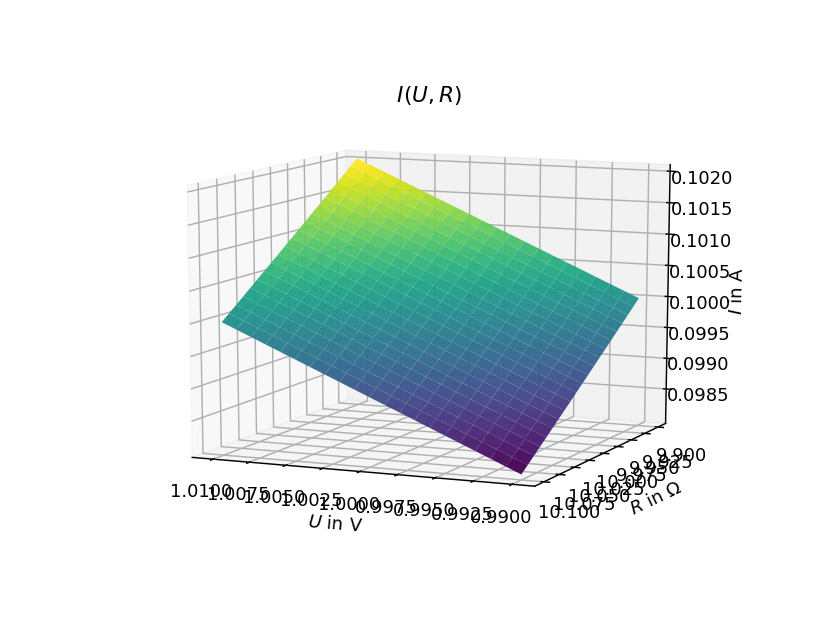

Text(0.5, 0.92, ' $I(U,R)$')

In [7]:
import sys
!{sys.executable} -m pip install numpy matplotlib seaborn > /dev/null
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

plt.rcParams['figure.dpi'] = 130

def solve_I(U, R):
	return U/R

R_real = 10.0 # Ohm
U_real = 1.0 # V

I_real = solve_I(U_real, R_real)

U_delta = 0.01 # V +/- accuracy
R_delta = 0.1 # Ohm

n_step = 21
steps = np.linspace(-1, 1, n_step)
U = steps*U_delta + U_real
R = steps*R_delta + R_real
U, R = np.meshgrid(U, R)
I = solve_I(U, R)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(U, R, I, cmap=plt.cm.viridis, linewidth=0, antialiased=True,alpha=0.95)

ax.set_xlabel("$U$ in V")
ax.set_ylabel("$R$ in $\Omega$")
ax.set_zlabel("$I$ in A")
ax.set_title(r" $I(U,R)$")



<IPython.core.display.Javascript object>


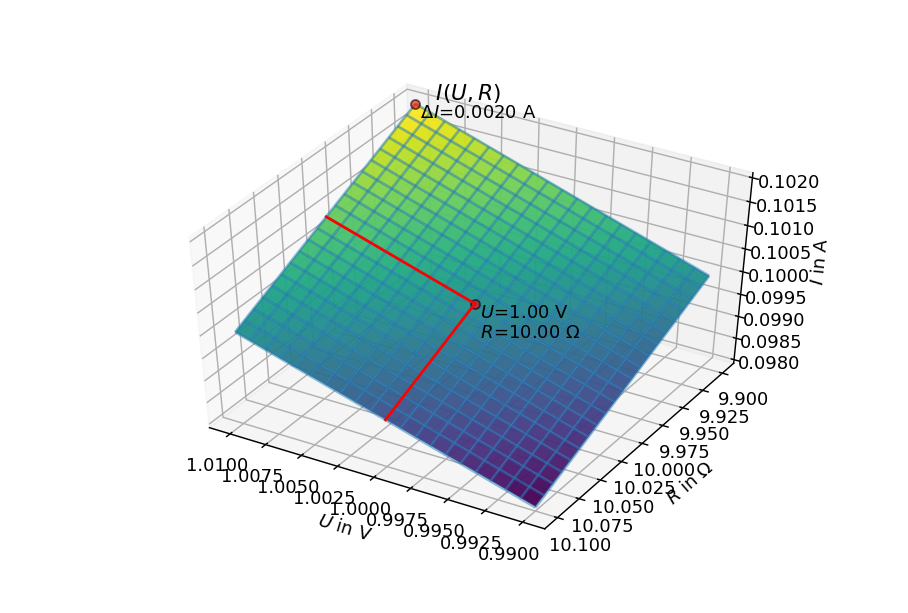

In [6]:
def solve_diff_U(U, R):	
	return 1/R

def solve_diff_R(U, R):
	return -U/R**2


steps_U, steps_R = np.meshgrid(steps*U_delta, steps*R_delta)
linearized_I = solve_diff_U(U_real, R_real)*steps_U + solve_diff_R(U_real, R_real) * steps_R + I_real

surf = ax.plot_wireframe(U, R, linearized_I, alpha=0.5) #, linewidth=0), color="r")

ax.plot([U_real], [R_real], [I_real], markerfacecolor='r', markeredgecolor='k', marker='o', markersize=5, alpha=0.6, zorder=5)
ax.text(U_real, R_real, I_real, " $U$=%.2f V\n $R$=%.2f $\Omega$"%(U_real, R_real), fontsize=10, va='top', zorder=10)

ax.plot(np.array([0,U_delta])+U_real, [R_real, R_real], [I_real, linearized_I[int(n_step/2), n_step-1]], color='r', zorder=5)
ax.plot([U_real, U_real], np.array([0,R_delta])+R_real, [I_real, linearized_I[n_step-1, int(n_step/2)]], color='r', zorder=5)

ax.plot([U_real+U_delta], [R_real-R_delta], [linearized_I[0,-1]], markerfacecolor='r', markeredgecolor='k', marker='o', markersize=5, alpha=0.6, zorder=5)
ax.text(U_real+U_delta, R_real-R_delta, linearized_I[0,-1], " $\Delta I$=%.4f A"%(linearized_I[0,-1]-I_real), fontsize=10, va='top', zorder=10)
fig

## Beispiel 2: Belasteter Spannungsteiler

Bedingt durch die Linearisierung gibt der berechnete Größtfehler nur eine exakte Lösung an, wenn alle höheren Ableitungen = 0 sind.
Ansonsten gibt der Größtfehler nur näherungsweise die Lösung an. Es entspricht einer Taylor-Reihenenticklung, die nach dem ersten Schritt abgebrochen wird.

Mit diesem 2. Beispiel soll dies verdeutlicht werden. 

In einem belasteten Spannungsteiler soll der Widerstand $R_b$ bestimmt werden.

![Belasteter Spannungsteiler](images/loaded_voltage_divider.png)


Bekannt sind:

* Widerstand $R_a$, angenommen ohne Fehler - genau bekannt.
* Widerstand $R_c$, angenommen ohne Fehler - genau bekannt. 
* Spannung $U_b$, gemessen, fehlerbehaftet.
* Spannung $U$, gemessen, fehlerbehaftet.

Mit gemessener Spannung $U_b$ und $U$ wird $R_b$ bestimmt:

$\frac{U}{{{U}_{b}}}=\frac{\left( {{R}_{b}}+{{R}_{a}}\right) \left( {{R}_{c}}+\frac{{{R}_{a}}{{R}_{b}}}{{{R}_{b}}+{{R}_{a}}}\right) }{{{R}_{a}}{{R}_{b}}}$

Umgeformt nach $R_b$:

${{R}_{b}}(U, U_b)= -\frac{{{R}_{a}}{{R}_{c}}{{U}_{b}}}{\left( {{R}_{c}}+{{R}_{a}}\right) {{U}_{b}}-{{R}_{a}}U}$

Es ist der maximale Fehler für $R_b$ gesucht, wenn beide gemessene Spannungen als fehlerbehaftet angenommen werden:

$\Delta U_b  = \pm 0.05 \mathrm{V}$

$\Delta U  = \pm 0.05 \mathrm{V}$

Partielle Ableitungen bilden:

$\frac{\partial R_b}{\partial U_b } = \frac{{{R}_{a}}{{R}_{c}}\left( {{R}_{c}}+{{R}_{a}}\right) {{U}_{b}}}{{{\left( \left( {{R}_{c}}+{{R}_{a}}\right) {{U}_{b}}-{{R}_{a}}U\right) }^{2}}}-\frac{{{R}_{a}}{{R}_{c}}}{\left( {{R}_{c}}+{{R}_{a}}\right) {{U}_{b}}-{{R}_{a}}U}$

$\frac{\partial R_b}{\partial U } = -\frac{{{{{R}_{a}}}^{2}}{{R}_{c}}{{U}_{b}}}{{{\left( \left( {{R}_{c}}+{{R}_{a}}\right) {{U}_{b}}-{{R}_{a}}U\right) }^{2}}}$

$\Delta R_b = | \frac{\partial R_b}{\partial U } \cdot \Delta U | + | \frac{\partial R_b}{\partial U_b } \cdot \Delta U_b | $


### Grafische Darstellung

Erneut kann das Ergebnis grafisch dargestellt werden:

* 1. horizontale Achse -> Abweichung von $U_b$
* 2. horizontale Achse -> Abweichung von $U$
* vertikale Achse -> Der resultierende Einfluss auf den gemessenen Widerstand $R_b$

Diesmal weicht der berechnete Größtfeher deutlich sichtbar von der tatsächlichen nicht-linearen Funktion ${{R}_{b}}(U, U_b)$ ab (siehe folgende Darstellung):

* Der Ausgangspunkt für die Linearisierung ist rot eingezeichnet.
* Das Ergebnis der Linearisierung ist als blaues Gitternetz dargestellt.
* Die farbige Fläche entspricht der tatsächlichen Funktion ${{R}_{b}}(U, U_b)$ 

Der Größtfehler ist zumeist eine brauchbare Schätzung und weit verbreitet.

Genauer ist es jedoch, in der tatsächlichen Funktion im verwendeten Wertebereich (in diesem Beispiel $\Delta U_b$ und  $\Delta U$ ) nach dem lokalen größten Maximum und kleinsten Minimum zu suchen.

<IPython.core.display.Javascript object>


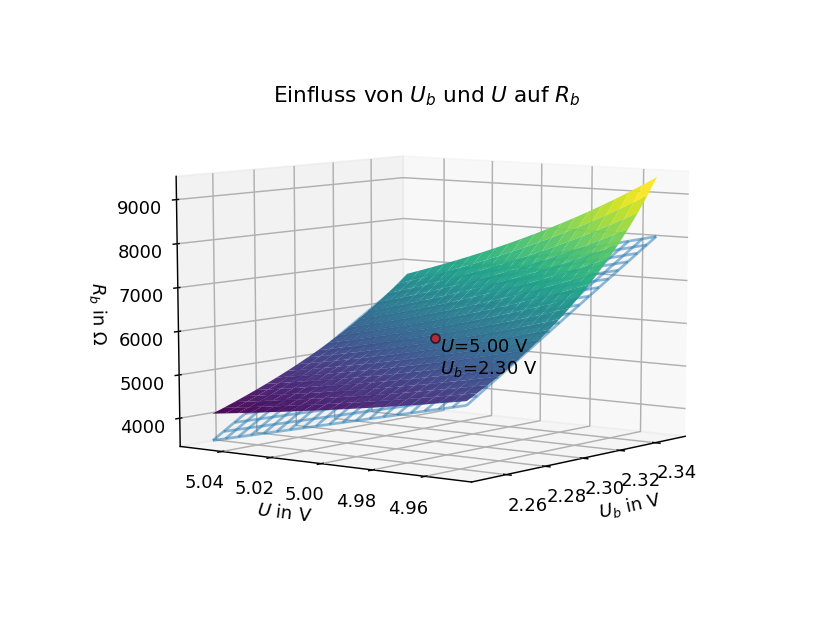

lin. Error for R_b: +/- 2281.250000 Ohm
real Error for R_b: + 3650.000000, - 1659.090909 Ohm


In [8]:
def example2():
	def solve_R_b(U, U_b):
		return - ((R_a*R_c*U_b)/((R_c+R_a)*U_b-R_a*U))

	def solve_diff_U_b(U, U_b):	
		return (R_a*R_c*(R_c+R_a)*U_b)/((R_c+R_a)*U_b-R_a*U)**2-(R_a*R_c)/((R_c+R_a)*U_b-R_a*U)

	def solve_diff_U(U, U_b):
		return -(R_a**2*R_c*U_b)/((R_c+R_a)*U_b-R_a*U)**2

	R_a = 1000.0 # Ohm
	R_c = 1000.0 # Ohm
	U_real = 5.0 # V
	U_b_real = 2.3 # V
	R_b_real = solve_R_b(U_real, U_b_real)

	U_delta = 0.05 # V +/- accuracy

	steps = np.linspace(-U_delta, U_delta, 20)
	U = steps + U_real
	U_b = steps + U_b_real
	U, U_b = np.meshgrid(U, U_b)
	R_b = solve_R_b(U, U_b)
	fig = plt.figure()
	ax = fig.gca(projection='3d')
	surf = ax.plot_surface(U_b, U, R_b, cmap=plt.cm.viridis, linewidth=0, antialiased=True,alpha=0.95)

	ax.plot([U_b_real], [U_real], [R_b_real], markerfacecolor='r', markeredgecolor='k', marker='o', markersize=5, alpha=0.6, zorder=5)

	steps_U, steps_U_b = np.meshgrid(steps, steps)
	linearized_R_b = solve_diff_U_b(U_real, U_b_real)*steps_U_b + solve_diff_U(U_real, U_b_real) * steps_U + R_b_real
   
	surf = ax.plot_wireframe(U_b, U, linearized_R_b, alpha=0.5) #, linewidth=0), color="r")
	ax.text(U_b_real, U_real, R_b_real, " $U$=%.2f V\n $U_b$=%.2f V"%(U_real, U_b_real), fontsize=10, va='top', zorder=10)
	ax.set_xlabel("$U_b$ in V")
	ax.set_ylabel("$U$ in V")
	ax.set_zlabel("$R_b$ in $\Omega$")
	ax.set_title(r"Einfluss von $U_b$ und $U$ auf $R_b$")

	delta_R_b = abs(solve_diff_U_b(U_real, U_b_real)*U_delta) + abs(solve_diff_U(U_real, U_b_real) * U_delta)
	print("lin. Error for R_b: +/- %f Ohm"%(delta_R_b))
	print("real Error for R_b: + %f, - %f Ohm"%(np.max(R_b)-R_b_real, R_b_real - np.min(R_b)))
    

example2()